<a href="https://colab.research.google.com/github/chavan-akshay/Sign-language-images-to-words-prediction/blob/main/Adam_0001Words_ASL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(5) 
import tensorflow as tf
#tf.set_random_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
!pip install pyunpack
!pip install patool

In [ ]:
from pyunpack import Archive
Archive('drive/MyDrive/OG_ASL.rar').extractall('/content')

In [ ]:

!unzip "drive/MyDrive/ASL_words.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ASL/Z/Z28.jpg           
  inflating: ASL/Z/Z280.jpg          
  inflating: ASL/Z/Z2800.jpg         
  inflating: ASL/Z/Z2801.jpg         
  inflating: ASL/Z/Z2802.jpg         
  inflating: ASL/Z/Z2803.jpg         
  inflating: ASL/Z/Z2804.jpg         
  inflating: ASL/Z/Z2805.jpg         
  inflating: ASL/Z/Z2806.jpg         
  inflating: ASL/Z/Z2807.jpg         
  inflating: ASL/Z/Z2808.jpg         
  inflating: ASL/Z/Z2809.jpg         
  inflating: ASL/Z/Z281.jpg          
  inflating: ASL/Z/Z2810.jpg         
  inflating: ASL/Z/Z2811.jpg         
  inflating: ASL/Z/Z2812.jpg         
  inflating: ASL/Z/Z2813.jpg         
  inflating: ASL/Z/Z2814.jpg         
  inflating: ASL/Z/Z2815.jpg         
  inflating: ASL/Z/Z2816.jpg         
  inflating: ASL/Z/Z2817.jpg         
  inflating: ASL/Z/Z2818.jpg         
  inflating: ASL/Z/Z2819.jpg         
  inflating: ASL/Z/Z282.jpg          
  inflating: ASL/Z/Z2820.jpg         

In [ ]:
train_dir = "ASL"
#eval_dir = "asl_alphabet_test/asl_alphabet_test"

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (48, 48))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

#if uniq_labels == sorted(os.listdir(eval_dir)):
 #   X_eval, y_eval = load_images(directory = eval_dir)


In [ ]:
print(labels)

In [ ]:
def load_images_eval(directory):
    images = []
    labels = []
    for file in os.listdir(directory):
      filepath = directory + "/" + file
      image = cv2.resize(cv2.imread(filepath), (48, 48))
      images.append(image)
            
    images = np.array(images)
    return(images)

In [ ]:
uniq_labels = sorted(os.listdir(eval_dir))
X_eval, y_eval = load_images_eval(directory = eval_dir)

In [ ]:
print(y_eval)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)



Total number of symbols:  51
Number of training images:  162400
Number of testing images:  40600


In [ ]:
eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

In [ ]:
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 7
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*(i+1))])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


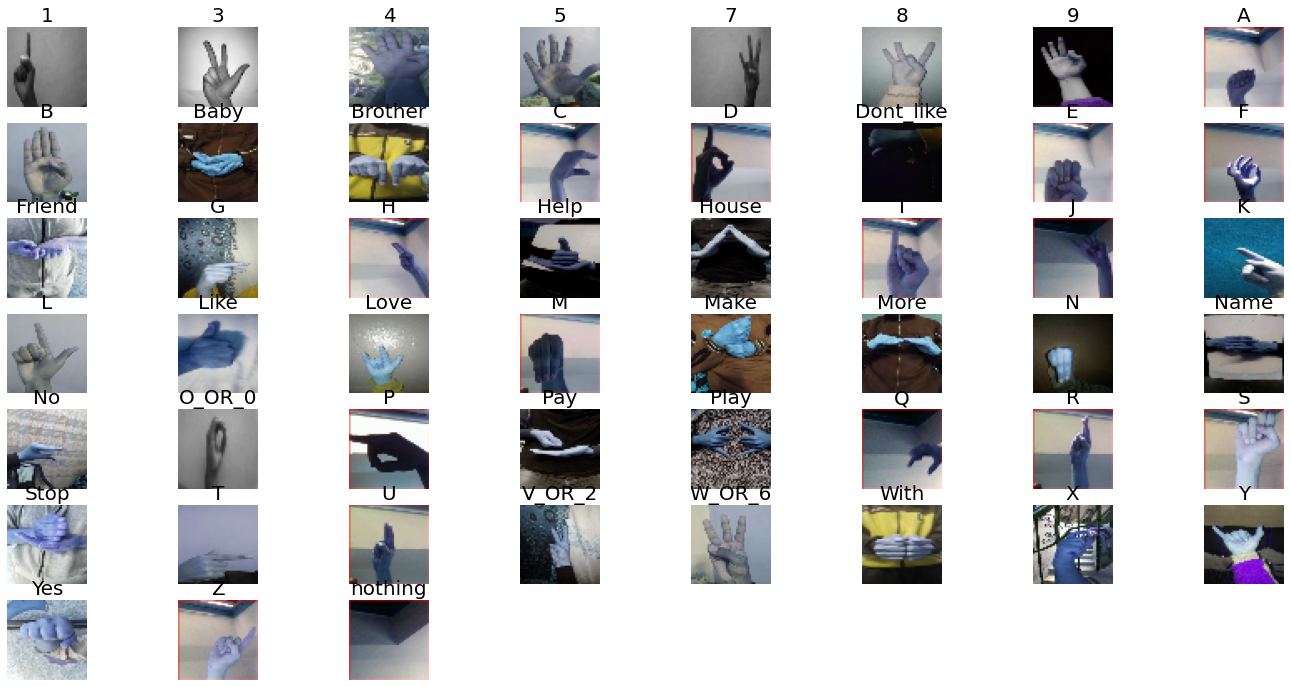

In [ ]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


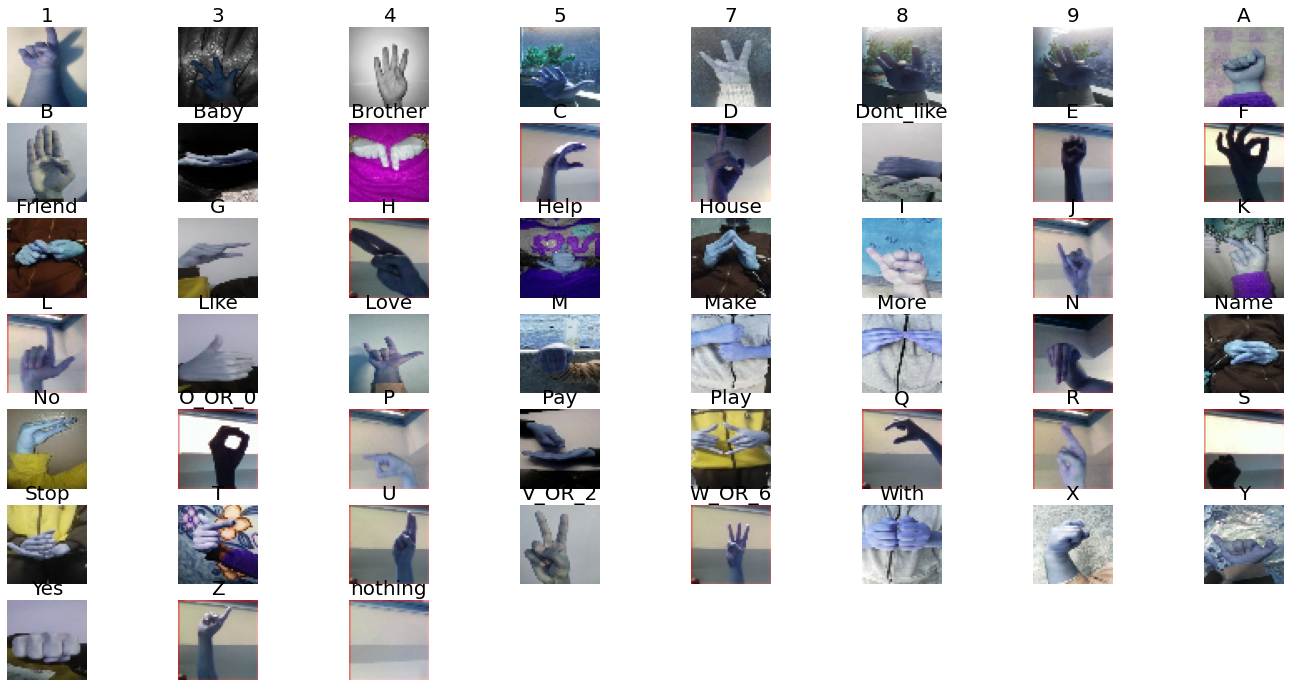

In [ ]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
#y_eval = keras.utils.to_categorical(y_eval)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0


In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                 input_shape = (48, 48, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(51, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 5
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_words_weights.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, epochs = 5, batch_size = 64, callbacks=callbacks_list)

In [ ]:
epochs = 2
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_words_weights_adam.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, epochs = 2, batch_size = 64, callbacks=callbacks_list)

Epoch 1/2
2538/2538 [==============================] - 8663s 3s/step - loss: 0.3399 - accuracy: 0.9022

Epoch 00001: accuracy improved from -inf to 0.91145, saving model to model_words_weights_adam.h5
Epoch 2/2
2538/2538 [==============================] - 8645s 3s/step - loss: 0.2486 - accuracy: 0.9247

Epoch 00002: accuracy improved from 0.91145 to 0.92633, saving model to model_words_weights_adam.h5


In [ ]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for test images: 97.591 %


In [ ]:
model.save('full5.model')

In [ ]:
model = keras.models.load_model('/content/model_words_weights_2rms.h5')

In [ ]:
y_test_pred = model.predict(X_eval, batch_size = 64, verbose = 0)

In [ ]:
print(y_test_pred[0])

In [ ]:
CATEGORIES = ["1", "3", "4", "5", "7","8", "9", "A", "B", "Baby", "Brother", "C", "D", "Dont_like", "E", "F", "Friend", "G", "H", "Help", "House", "I", "J", "K", "L", "Like", "Love", "M", "Make", "More", "N", "Name", "No", "O_OR_0", "P", "Pay", "Play", "Q", "R", "S", "Stop", "T", "U", "V_OR_2", "W_OR_6", "With", "X", "Y", "Yes", "Z", "nothing"]
def prepare(filepath):
    IMG_SIZE = 48
    image = cv2.resize(cv2.imread(filepath), (48, 48))
    images = np.array(image)
    images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    images = images.astype('float32')/255.0
    return images


In [ ]:
#prediction = model.predict([prepare("asl_alphabet_test/asl_alphabet_test/R_test.jpg")])
prediction = model.predict([prepare("ASLV.png")])

print(prediction)
print(CATEGORIES[int(np.argmax(prediction[0]))])

[[0.05587753 0.00666065 0.01710256 0.00394927 0.01348037 0.0446322
  0.03546748 0.04645842 0.04032391 0.00050852 0.00041531 0.01274612
  0.03247706 0.00264326 0.10055644 0.02762703 0.00126698 0.00873574
  0.02426539 0.00066496 0.00208172 0.11775095 0.0374372  0.01316149
  0.00448299 0.00404062 0.00264492 0.02354331 0.00150044 0.00206389
  0.01882888 0.0011268  0.00411264 0.01517188 0.00797143 0.00037541
  0.00225395 0.01369438 0.03454025 0.086194   0.00106825 0.01754022
  0.0210187  0.00922641 0.00387904 0.00372211 0.02709381 0.01672275
  0.00881654 0.021923   0.00015278]]
I
